In [1]:
from pandas import DataFrame, Series
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
# read in the main training csv
train_main = pd.read_csv('application_train.csv', na_values=['','XNA','XAP'])

In [4]:
print(train_main.shape)
train_main[:5]

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
# Drop records that are too sparse (after previous discovery, these are usually not represented in test data
# Family Status: Unknown
train_main = train_main[train_main['NAME_FAMILY_STATUS'] != 'Unknown'] #2 records with unknown family status
train_main = train_main[train_main['NAME_INCOME_TYPE'] != 'Businessman'] #10 businessman

In [6]:
train_main.shape # 12 records dropped

(307499, 122)

In [7]:
# read in the ancillary csv's
credit_card = pd.read_csv('cleaned_tables/credit_card_summary.csv')
POS = pd.read_csv('cleaned_tables/df_POS_final2.csv')
install = pd.read_csv('cleaned_tables/df_pay_final2.csv')
bureau = pd.read_csv('cleaned_tables/Bureau_features.csv')
prev = pd.read_csv('cleaned_tables/prevapp_finally_train.csv')

### Get column names of additional tables

In [8]:
cred_col = credit_card.columns
credit_col = cred_col[1:]
len(credit_col) #8 extra

7

In [9]:
POS.drop(['DPD_df_POS','count_df_POS'], axis = 1, inplace = True)

In [10]:
POS_col = POS.columns[1:]
len(POS_col) #4 extra

4

In [11]:
install_col = install.columns[1:]
len(install_col) #12 extra

12

In [12]:
bureau_col = bureau.columns[1:]
len(bureau_col) #15 extra

15

In [13]:
prev_col = prev.columns[1:]
len(prev_col) # 10 extra

10

### merge tables

In [14]:
df = train_main.merge(credit_card, how = 'left', on = 'SK_ID_CURR')
df = df.merge(POS, how = 'left', left_on ='SK_ID_CURR', right_on = 'SK_ID_CURR_df_POS').drop('SK_ID_CURR_df_POS', axis = 1)
df = df.merge(install, how = 'left', left_on = 'SK_ID_CURR', right_on = 'SK_ID_CURR_pay').drop('SK_ID_CURR_pay', axis = 1)
df = df.merge(bureau, how = 'left', on = 'SK_ID_CURR')
df = df.merge(prev, how = 'left', left_on = 'SK_ID_CURR', right_on = 'ID_CURR').drop('ID_CURR',axis = 1)

In [15]:
df[:5]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AVG_CC_BALANCE,MAX_CC_BALANCE,MIN_CC_BALANCE,MED_CC_BALANCE,MAX_CC_DPD,MIN_CC_DPD,ZERO_CC_DPD,max_df_POS,min_df_POS,mean_df_POS,percentage_no_DPD_df_POS,NUM_INSTALMENT_NUMBER_pay,DPD_max_pay,DPD_min_pay,DPD_avg_pay,DPD_Count_pay,AMT_INSTALMENT_pay,AMT_PAYMENT_pay,PERCENT_NOT_PAID_pay,OWED_pay,PERCENT_UNDER_PAID_pay,PERCENT_OWED_pay,no_DPD_Percentage_pay,Percent_BU_CREDIT_ACTIVE,COUNT_BU_CREDIT_ACTIVE,AVG_BU_DAYS_CREDIT,MAX_BU_CREDIT_DAY_OVERDUE,MIN_BU_CREDIT_DAY_OVERDUE,AVG_BU_CREDIT_DAY_OVERDUE,percent_BU_CREDIT_DAY_OVERDUE,MAX_BU_DAYS_CREDIT_ENDDATE,MAX_BU_DAYS_ENDDATE,AVG_BU_CNT_CREDIT_PROLONG,MAX_BU_CNT_CREDIT_PROLONG,SUM_BU_AMT_CREDIT_SUM,COUNT_BU_CREDIT_TYPE,MAX_BU_PERCENT_SUM_OVERDUE,AVG_BU_PERCENT_SUM_OVERDUE,AMT_APPLICATION,NUM_APPLICATIONS,AMT_APPROVED,PCT_APPROVED,MIN_DAYS_DECISION,PCT_APPL_ON_SAME_DAY,min_term,max_term,mean_term,DAYS_TERMINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,19.0,-12.0,-31.0,-20.421053,0.0,219625.695,219625.695,0.0,0.000,0.000000,0.000000,1.000000,0.00,4.0,-645.0,0.0,0.0,0.0,0.0,85.0,-36.0,0.0,0.0,315567.0,2.0,0.0,0

### Fill nas for the summarized columns
if they did not appear in other tables, they did not have previous applications, credit cards, etc.

In [16]:
addl_col = cred_col.append([POS_col, install_col, bureau_col, prev_col]) # append other tables' columns as well
df[addl_col] = df[addl_col].fillna(0)
df[:5]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AVG_CC_BALANCE,MAX_CC_BALANCE,MIN_CC_BALANCE,MED_CC_BALANCE,MAX_CC_DPD,MIN_CC_DPD,ZERO_CC_DPD,max_df_POS,min_df_POS,mean_df_POS,percentage_no_DPD_df_POS,NUM_INSTALMENT_NUMBER_pay,DPD_max_pay,DPD_min_pay,DPD_avg_pay,DPD_Count_pay,AMT_INSTALMENT_pay,AMT_PAYMENT_pay,PERCENT_NOT_PAID_pay,OWED_pay,PERCENT_UNDER_PAID_pay,PERCENT_OWED_pay,no_DPD_Percentage_pay,Percent_BU_CREDIT_ACTIVE,COUNT_BU_CREDIT_ACTIVE,AVG_BU_DAYS_CREDIT,MAX_BU_CREDIT_DAY_OVERDUE,MIN_BU_CREDIT_DAY_OVERDUE,AVG_BU_CREDIT_DAY_OVERDUE,percent_BU_CREDIT_DAY_OVERDUE,MAX_BU_DAYS_CREDIT_ENDDATE,MAX_BU_DAYS_ENDDATE,AVG_BU_CNT_CREDIT_PROLONG,MAX_BU_CNT_CREDIT_PROLONG,SUM_BU_AMT_CREDIT_SUM,COUNT_BU_CREDIT_TYPE,MAX_BU_PERCENT_SUM_OVERDUE,AVG_BU_PERCENT_SUM_OVERDUE,AMT_APPLICATION,NUM_APPLICATIONS,AMT_APPROVED,PCT_APPROVED,MIN_DAYS_DECISION,PCT_APPL_ON_SAME_DAY,min_term,max_term,mean_term,DAYS_TERMINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,19.0,-12.0,-31.0,-20.421053,0.0,219625.695,219625.695,0.0,0.000,0.000000,0.000000,1.000000,0.00,4.0,-645.0,0.0,0.0,0.0,0.0,85.0,-36.0,0.0,0.0,315567.0,2.0,0.0,0

### Required preprocessing steps for the whole table
1. Split train / test
2. Fill NAs - following the decision made when exploring the main table
3. Set up categorical variables
4. Rebalance / SMOTE

### 1. Split train/test

In [17]:
X = df[df.columns[2:]]
print(X.shape)
X[:2]

(307499, 168)


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AVG_CC_BALANCE,MAX_CC_BALANCE,MIN_CC_BALANCE,MED_CC_BALANCE,MAX_CC_DPD,MIN_CC_DPD,ZERO_CC_DPD,max_df_POS,min_df_POS,mean_df_POS,percentage_no_DPD_df_POS,NUM_INSTALMENT_NUMBER_pay,DPD_max_pay,DPD_min_pay,DPD_avg_pay,DPD_Count_pay,AMT_INSTALMENT_pay,AMT_PAYMENT_pay,PERCENT_NOT_PAID_pay,OWED_pay,PERCENT_UNDER_PAID_pay,PERCENT_OWED_pay,no_DPD_Percentage_pay,Percent_BU_CREDIT_ACTIVE,COUNT_BU_CREDIT_ACTIVE,AVG_BU_DAYS_CREDIT,MAX_BU_CREDIT_DAY_OVERDUE,MIN_BU_CREDIT_DAY_OVERDUE,AVG_BU_CREDIT_DAY_OVERDUE,percent_BU_CREDIT_DAY_OVERDUE,MAX_BU_DAYS_CREDIT_ENDDATE,MAX_BU_DAYS_ENDDATE,AVG_BU_CNT_CREDIT_PROLONG,MAX_BU_CNT_CREDIT_PROLONG,SUM_BU_AMT_CREDIT_SUM,COUNT_BU_CREDIT_TYPE,MAX_BU_PERCENT_SUM_OVERDUE,AVG_BU_PERCENT_SUM_OVERDUE,AMT_APPLICATION,NUM_APPLICATIONS,AMT_APPROVED,PCT_APPROVED,MIN_DAYS_DECISION,PCT_APPL_ON_SAME_DAY,min_term,max_term,mean_term,DAYS_TERMINATION
0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,19.0,-12.0,-31.0,-20.421053,0.0,219625.695,219625.695,0.0,0.0,0.0,0.0,1.0,0.00,4.0,-645.0,0.0,0.0,0.0,0.0,85.0,-36.0,0.0,0.0,315567.0,2.0,0.0,0.0,179055.0,1.0,179055.0,1.0,-606.0,0.0,24.0

In [18]:
y = df['TARGET']
print(y.shape)

(307499,)


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [20]:
print(len(X_train),len(X_test),len(y_train),len(y_test))
print(len(y_train[y_train == 0])/len(y_train),len(y_test[y_test == 0])/len(y_test))

245999 61500 245999 61500
0.9190728417595193 0.9200487804878049


### 2. Fill in missing values

In [21]:
# Drop highly correlated "current housing" attributes
X_train_nona = X_train.drop(['APARTMENTS_AVG',
'APARTMENTS_MODE',
'BASEMENTAREA_AVG',
'BASEMENTAREA_MODE',
'COMMONAREA_AVG',
'COMMONAREA_MODE',
'ELEVATORS_AVG',
'ELEVATORS_MODE',
'ENTRANCES_AVG',
'ENTRANCES_MODE',
'FLOORSMAX_AVG',
'FLOORSMAX_MODE',
'FLOORSMIN_AVG',
'FLOORSMIN_MODE',
'LANDAREA_AVG',
'LANDAREA_MODE',
'LIVINGAPARTMENTS_AVG',
'LIVINGAPARTMENTS_MODE',
'LIVINGAREA_AVG',
'LIVINGAREA_MODE',
'NONLIVINGAPARTMENTS_AVG',
'NONLIVINGAPARTMENTS_MODE',
'NONLIVINGAREA_AVG',
'NONLIVINGAREA_MODE',
'YEARS_BEGINEXPLUATATION_AVG',
'YEARS_BEGINEXPLUATATION_MEDI',
'YEARS_BEGINEXPLUATATION_MODE',
'YEARS_BUILD_AVG',
'YEARS_BUILD_MODE',
'DEF_60_CNT_SOCIAL_CIRCLE',
'OBS_60_CNT_SOCIAL_CIRCLE'], axis = 1)

X_test_nona = X_test.drop(['APARTMENTS_AVG',
'APARTMENTS_MODE',
'BASEMENTAREA_AVG',
'BASEMENTAREA_MODE',
'COMMONAREA_AVG',
'COMMONAREA_MODE',
'ELEVATORS_AVG',
'ELEVATORS_MODE',
'ENTRANCES_AVG',
'ENTRANCES_MODE',
'FLOORSMAX_AVG',
'FLOORSMAX_MODE',
'FLOORSMIN_AVG',
'FLOORSMIN_MODE',
'LANDAREA_AVG',
'LANDAREA_MODE',
'LIVINGAPARTMENTS_AVG',
'LIVINGAPARTMENTS_MODE',
'LIVINGAREA_AVG',
'LIVINGAREA_MODE',
'NONLIVINGAPARTMENTS_AVG',
'NONLIVINGAPARTMENTS_MODE',
'NONLIVINGAREA_AVG',
'NONLIVINGAREA_MODE',
'YEARS_BEGINEXPLUATATION_AVG',
'YEARS_BEGINEXPLUATATION_MEDI',
'YEARS_BEGINEXPLUATATION_MODE',
'YEARS_BUILD_AVG',
'YEARS_BUILD_MODE',
'DEF_60_CNT_SOCIAL_CIRCLE',
'OBS_60_CNT_SOCIAL_CIRCLE'], axis = 1)

In [22]:
print(X_train_nona.shape, X_test_nona.shape) # 31 columns dropped; 169 --> 138

(245999, 137) (61500, 137)


In [23]:
# Filling with Medians
columns_with_median = ['COMMONAREA_MEDI',
'LIVINGAPARTMENTS_MEDI',
'FLOORSMIN_MEDI',
'LANDAREA_MEDI',
'BASEMENTAREA_MEDI',
'ELEVATORS_MEDI',
'APARTMENTS_MEDI',
'ENTRANCES_MEDI',
'LIVINGAREA_MEDI',
'FLOORSMAX_MEDI',
'AMT_GOODS_PRICE',
'AMT_ANNUITY']

for col in columns_with_median:
    X_train_nona[col].fillna(X_train_nona[col].median(), inplace = True)
    X_test_nona[col].fillna(X_train_nona[col].median(), inplace = True)

In [24]:
# Filling with Means
columns_with_means = ['YEARS_BUILD_MEDI',
'EXT_SOURCE_1',
'TOTALAREA_MODE',
'EXT_SOURCE_3',
'EXT_SOURCE_2']

for col in columns_with_means:
    X_train_nona[col].fillna(X_train_nona[col].mean(), inplace = True)
    X_test_nona[col].fillna(X_train_nona[col].mean(), inplace = True)

In [25]:
# Fill with Mode
columns_with_modes = ['FONDKAPREMONT_MODE',
'HOUSETYPE_MODE',
'EMERGENCYSTATE_MODE']

for col in columns_with_modes:
    X_train_nona[col].fillna(X_train_nona[col].mode()[0], inplace = True)
    X_test_nona[col].fillna(X_train_nona[col].mode()[0], inplace = True)

In [26]:
# Fill with 0's

columns_with_0s = ['NONLIVINGAPARTMENTS_MEDI',
'OWN_CAR_AGE',
'NONLIVINGAREA_MEDI',
'AMT_REQ_CREDIT_BUREAU_YEAR',
'AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_HOUR',
'AMT_REQ_CREDIT_BUREAU_MON',
'OBS_30_CNT_SOCIAL_CIRCLE',
'DEF_30_CNT_SOCIAL_CIRCLE',
'CNT_FAM_MEMBERS',
'DAYS_LAST_PHONE_CHANGE']

for col in columns_with_0s:
    X_train_nona[col].fillna(0, inplace = True)
    X_test_nona[col].fillna(0, inplace = True)

In [27]:
# Other special cases
X_train_nona['WALLSMATERIAL_MODE'].fillna("Others",inplace = True)
X_train_nona['OCCUPATION_TYPE'].fillna("Unemployed",inplace = True)
X_train_nona['ORGANIZATION_TYPE'].fillna("Retired",inplace = True)
X_train_nona['NAME_TYPE_SUITE'].fillna("Unaccompanied",inplace = True)
X_train_nona['CODE_GENDER'].fillna("F",inplace = True)

X_test_nona['WALLSMATERIAL_MODE'].fillna("Others",inplace = True)
X_test_nona['OCCUPATION_TYPE'].fillna("Unemployed",inplace = True)
X_test_nona['ORGANIZATION_TYPE'].fillna("Retired",inplace = True)
X_test_nona['NAME_TYPE_SUITE'].fillna("Unaccompanied",inplace = True)
X_test_nona['CODE_GENDER'].fillna("F",inplace = True)

In [28]:
# verify that there's no more missing values in the training data
(X_train_nona.isnull().sum() / len(X_train_nona)*100).sort_values(ascending = False)

DAYS_TERMINATION                 0.0
APARTMENTS_MEDI                  0.0
FLOORSMAX_MEDI                   0.0
ENTRANCES_MEDI                   0.0
ELEVATORS_MEDI                   0.0
COMMONAREA_MEDI                  0.0
YEARS_BUILD_MEDI                 0.0
BASEMENTAREA_MEDI                0.0
EXT_SOURCE_3                     0.0
FLAG_DOCUMENT_6                  0.0
EXT_SOURCE_2                     0.0
EXT_SOURCE_1                     0.0
ORGANIZATION_TYPE                0.0
LIVE_CITY_NOT_WORK_CITY          0.0
REG_CITY_NOT_WORK_CITY           0.0
REG_CITY_NOT_LIVE_CITY           0.0
FLOORSMIN_MEDI                   0.0
LANDAREA_MEDI                    0.0
LIVINGAPARTMENTS_MEDI            0.0
LIVINGAREA_MEDI                  0.0
NONLIVINGAPARTMENTS_MEDI         0.0
NONLIVINGAREA_MEDI               0.0
FONDKAPREMONT_MODE               0.0
HOUSETYPE_MODE                   0.0
TOTALAREA_MODE                   0.0
WALLSMATERIAL_MODE               0.0
EMERGENCYSTATE_MODE              0.0
O

In [29]:
(X_test_nona.isnull().sum() / len(X_test_nona)*100).sort_values(ascending = False)

DAYS_TERMINATION                 0.0
APARTMENTS_MEDI                  0.0
FLOORSMAX_MEDI                   0.0
ENTRANCES_MEDI                   0.0
ELEVATORS_MEDI                   0.0
COMMONAREA_MEDI                  0.0
YEARS_BUILD_MEDI                 0.0
BASEMENTAREA_MEDI                0.0
EXT_SOURCE_3                     0.0
FLAG_DOCUMENT_6                  0.0
EXT_SOURCE_2                     0.0
EXT_SOURCE_1                     0.0
ORGANIZATION_TYPE                0.0
LIVE_CITY_NOT_WORK_CITY          0.0
REG_CITY_NOT_WORK_CITY           0.0
REG_CITY_NOT_LIVE_CITY           0.0
FLOORSMIN_MEDI                   0.0
LANDAREA_MEDI                    0.0
LIVINGAPARTMENTS_MEDI            0.0
LIVINGAREA_MEDI                  0.0
NONLIVINGAPARTMENTS_MEDI         0.0
NONLIVINGAREA_MEDI               0.0
FONDKAPREMONT_MODE               0.0
HOUSETYPE_MODE                   0.0
TOTALAREA_MODE                   0.0
WALLSMATERIAL_MODE               0.0
EMERGENCYSTATE_MODE              0.0
O

# Would need to do the same for testing to check model accuracy

### 3. Identify and codify categorical columns - X_train and X_test

### Identify categorical columns

In [30]:
# Categorical columns with strings
string_categorical = X_train_nona.columns[X_train_nona.dtypes == 'object']
s1 = df[string_categorical].nunique()

In [31]:
# string binary
binary_cat = s1[s1 ==2].index 
binary_cat

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'EMERGENCYSTATE_MODE'],
      dtype='object')

In [32]:
# Categorical columns have numerical values
s2 = X_train_nona.loc[:,df.dtypes != 'object'].nunique()

In [33]:
# numerical binary
binary_cat = binary_cat.append(s2[s2==2].index[1:]) #numerical binary; exclude target

In [34]:
#all binary
binary_cat

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'EMERGENCYSTATE_MODE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21'],
      dtype='object')

In [35]:
# all non-binary categorical columns
non_bi_cat = s1[s1>2].index # string
non_bi_cat = non_bi_cat.append(s2[(s2>2) & (s2<5)].index) # numerical
non_bi_cat # all

Index(['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY'],
      dtype='object')

In [36]:
print(len(binary_cat), len(non_bi_cat), len(X_train_nona.columns))

36 13 137


### Codify categorical columns
- Binary: label encoder
- Non-binary: get_dummies

In [37]:
# binary
for column in binary_cat:
    X_train_nona[column] = X_train_nona[column].astype('category').cat.codes
    X_test_nona[column] = X_test_nona[column].astype('category').cat.codes

In [38]:
# verifying everyone has two categories
X_train_nona[binary_cat].nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
EMERGENCYSTATE_MODE            2
FLAG_EMP_PHONE                 2
FLAG_WORK_PHONE                2
FLAG_CONT_MOBILE               2
FLAG_PHONE                     2
FLAG_EMAIL                     2
REG_REGION_NOT_LIVE_REGION     2
REG_REGION_NOT_WORK_REGION     2
LIVE_REGION_NOT_WORK_REGION    2
REG_CITY_NOT_LIVE_CITY         2
REG_CITY_NOT_WORK_CITY         2
LIVE_CITY_NOT_WORK_CITY        2
FLAG_DOCUMENT_2                2
FLAG_DOCUMENT_3                2
FLAG_DOCUMENT_4                2
FLAG_DOCUMENT_5                2
FLAG_DOCUMENT_6                2
FLAG_DOCUMENT_7                2
FLAG_DOCUMENT_8                2
FLAG_DOCUMENT_9                2
FLAG_DOCUMENT_10               2
FLAG_DOCUMENT_11               2
FLAG_DOCUMENT_12               2
FLAG_DOCUMENT_13               2
FLAG_DOCUMENT_14               2
FLAG_DOCUMENT_15               2
FLAG_DOCUM

In [39]:
# non-binary
X_train_nona = pd.get_dummies(X_train_nona,
                            prefix=non_bi_cat,
                            columns=non_bi_cat)
X_train_nona.shape #up from 138

(245999, 258)

In [40]:
X_test_nona = pd.get_dummies(X_test_nona,
                            prefix=non_bi_cat,
                            columns=non_bi_cat)
X_test_nona.shape #same with training

(61500, 258)

In [41]:
X_train_nona.shape

(245999, 258)

In [42]:
y_train.shape

(245999,)

In [43]:
X_test_nona.shape

(61500, 258)

In [44]:
y_test.shape

(61500,)

## Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn import metrics

### SHAP for RF

#### rf with 20 features

In [46]:
top_20_features = ['EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'DAYS_ID_PUBLISH',
 'DAYS_REGISTRATION',
 'AMT_PAYMENT_pay',
 'AMT_INSTALMENT_pay',
 'AMT_ANNUITY',
 'DPD_avg_pay',
 'DAYS_EMPLOYED',
 'DAYS_LAST_PHONE_CHANGE',
 'EXT_SOURCE_1',
 'AMT_CREDIT',
 'DPD_min_pay',
 'AMT_APPLICATION',
 'MIN_DAYS_DECISION',
 'AMT_APPROVED',
 'NUM_INSTALMENT_NUMBER_pay',
 'REGION_POPULATION_RELATIVE',
 'AMT_INCOME_TOTAL']

In [47]:
X_train_20 = X_train_nona[top_20_features]
X_test_20 = X_test_nona[top_20_features]

In [48]:
%%time
clf2 = RandomForestClassifier(random_state=4444,n_estimators=200)
clf2.fit(X_train_20,y_train)

Wall time: 3min 11s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=4444,
                       verbose=0, warm_start=False)

In [49]:
y_pred_20 = clf2.predict(X_train_20)
y_pred_test_20 = clf2.predict(X_test_20)
print("training accuracy:", round(metrics.accuracy_score(y_train,y_pred_20),4), "\n"
     "test accuracy:", round(metrics.accuracy_score(y_test,y_pred_test_20),4))

training accuracy: 1.0 
test accuracy: 0.9202


In [50]:
y_pred_test_proba_20 = clf2.predict_proba(X_test_20)
y_pred_test_proba_20 = y_pred_test_proba_20[:,1]
roc_auc_score(y_test,y_pred_test_proba_20)

0.7268394978077148

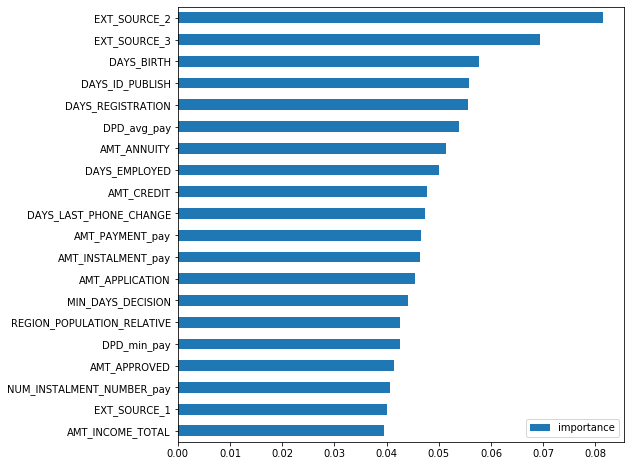

In [51]:
feature_importances_rf= pd.DataFrame(clf2.feature_importances_,
                                   index = X_train_20.columns,
                                    columns=['importance']).sort_values('importance', ascending=True)
feature_importances_rf.plot(kind='barh',figsize=(8, 8))

## XGBoost

### GridSearch

In [53]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

In [ ]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [ ]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [ ]:
folds = 3
param_comb = 5
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

In [ ]:
random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train_20,y_train), verbose=3, random_state=1001 )

In [ ]:
%%time
random_search.fit(X_train_20,y_train)

In [82]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)


 All results:
{'mean_fit_time': array([106.52228975, 156.46861879, 149.55173389, 117.43561673,
       133.98204962]), 'std_fit_time': array([0.26562124, 1.72909446, 0.15752695, 0.72264633, 1.54388601]), 'mean_score_time': array([1.10371542, 2.2227234 , 2.22072585, 2.18283002, 1.53421505]), 'std_score_time': array([0.006583  , 0.0135367 , 0.04973781, 0.015881  , 0.02374415]), 'param_subsample': masked_array(data=[1.0, 0.6, 0.8, 1.0, 0.8],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[5, 1, 5, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[3, 5, 5, 5, 4],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[5, 1.5, 1, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?

### XGBoosting with GridSearch results

In [54]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1.5,
              learning_rate=0.02, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=600, n_jobs=1,
              nthread=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=0.6, verbosity=1)

In [55]:
%%time
xgb.fit(X_train_20,y_train)

Wall time: 3min 57s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1.5,
              learning_rate=0.02, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=600, n_jobs=1,
              nthread=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=0.6, verbosity=1)

In [56]:
y_pred_20 = xgb.predict(X_train_20)
y_pred_test_20 = xgb.predict(X_test_20)
print("training accuracy:", round(metrics.accuracy_score(y_train,y_pred_20),4), "\n"
     "test accuracy:", round(metrics.accuracy_score(y_test,y_pred_test_20),4))

training accuracy: 0.92 
test accuracy: 0.9204


In [57]:
y_pred_test_proba_20 = xgb.predict_proba(X_test_20)
y_pred_test_proba_20 = y_pred_test_proba_20[:,1]
roc_auc_score(y_test,y_pred_test_proba_20)

0.751895188636392

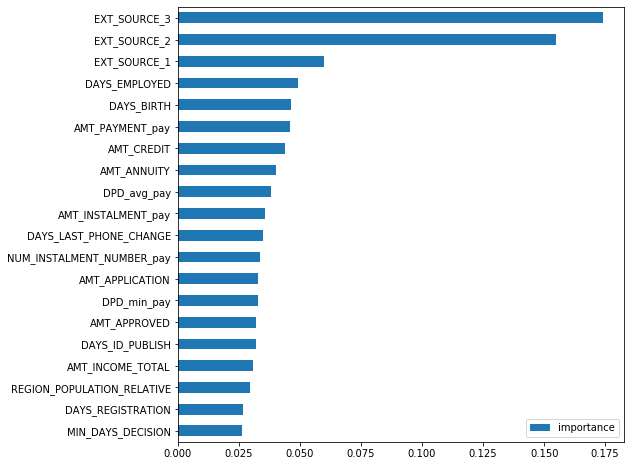

In [58]:
feature_importances_xgb= pd.DataFrame(xgb.feature_importances_,
                                   index = X_train_20.columns,
                                    columns=['importance']).sort_values('importance', ascending=True)
feature_importances_xgb.plot(kind='barh',figsize=(8, 8))

In [ ]:
# find the best threshold
from sklearn.metrics import roc_curve
def Find_Optimal_Cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations
    predicted : Matrix with predicted data, where rows are observations
    Returns
    -------
    list type, with optimal cutoff value
    """
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr))
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]
    return list(roc_t['threshold'])

In [ ]:
best_threshold = Find_Optimal_Cutoff(y_test,y_pred_test_proba_20)
best_f1_score = f1_score(y_test, (y_pred_test_proba_20 > best_threshold))
print("The best F1 score", round(best_f1_score,8), "is achieved with the threshold of", round(best_threshold[0], 8))

In [ ]:
pd.crosstab(y_test, y_pred_test_20, rownames=['True'], colnames=['Predicted'])

## SHAP on Random Forest

In [59]:
import shap

In [60]:
%%time
#SHAP with top 20 RF model
explainer = shap.TreeExplainer(clf2)
#shap_values = explainer.shap_values(X_test_20[:1000])

Wall time: 756 ms


In [61]:
print('Expected Value:', explainer.expected_value)

Expected Value: [0.91902422 0.08097578]


In [62]:
#pd.DataFrame(shap_values_1).to_csv('SHAP_NOSMOTED_RF.csv',index=False)
shap_values_1 = pd.read_csv('SHAP_NOSMOTED_RF.csv')
shap_values_1 = np.asarray(shap_values_1)

In [117]:
df_shap_values_1 = DataFrame(shap_values_1)

In [124]:
abs(df_shap_values_1.iloc[21]).sum()

0.21063637471384952

In [125]:
abs(df_shap_values_1.iloc[666]).sum()

0.09202597838165985

In [65]:
#shap_values_1 = shap_values[1]

In [64]:
shap.initjs()

In [66]:
shap.force_plot(explainer.expected_value[1], 
                shap_values_1[32,:], X_test_20.iloc[32,:])

In [67]:
shap.force_plot(explainer.expected_value[1], 
                shap_values_1[205,:], X_test_20.iloc[205,:])

In [68]:
#Don't change
shap.force_plot(explainer.expected_value[1], 
                shap_values_1[809,:], X_test_20.iloc[809,:])

In [154]:
shap.force_plot(explainer.expected_value[1], 
                shap_values_1[757,:], X_test_20.iloc[757,:])

In [129]:
abs(df_shap_values_1.iloc[820]).sum()

0.3247022535170298

In [155]:
#Large loan
shap.force_plot(explainer.expected_value[1], 
                shap_values_1[958,:], X_test_20.iloc[958,:])

In [151]:
abs(df_shap_values_1.iloc[427]).sum()

0.11439318769260882

In [152]:
abs(df_shap_values_1.iloc[797]).sum()

0.08857449011537945

In [135]:
X_train_20.columns

Index(['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'DAYS_ID_PUBLISH',
       'DAYS_REGISTRATION', 'AMT_PAYMENT_pay', 'AMT_INSTALMENT_pay',
       'AMT_ANNUITY', 'DPD_avg_pay', 'DAYS_EMPLOYED', 'DAYS_LAST_PHONE_CHANGE',
       'EXT_SOURCE_1', 'AMT_CREDIT', 'DPD_min_pay', 'AMT_APPLICATION',
       'MIN_DAYS_DECISION', 'AMT_APPROVED', 'NUM_INSTALMENT_NUMBER_pay',
       'REGION_POPULATION_RELATIVE', 'AMT_INCOME_TOTAL'],
      dtype='object')

SHAP values (feature contributions) are large as AMT_APPROVED increases. It also appears that the model is predicting that applicants with large loans usually don't default. Upon close examinations, we realized that these applicants have really good credit history, i.e. their EXT_SOURCE variables are high. So these high EXT_SOURCE variables are making large contributions to the predicted outcome. This kind of make sense, you would expect people with good credit history to be more likely to apply for larger amount of loan (rich people try to buy an expensive house). Our model seems to be agreeing with the bank's loan approval decision making. 

In [98]:
shap.force_plot(explainer.expected_value[1], shap_values_1, X_test_20)

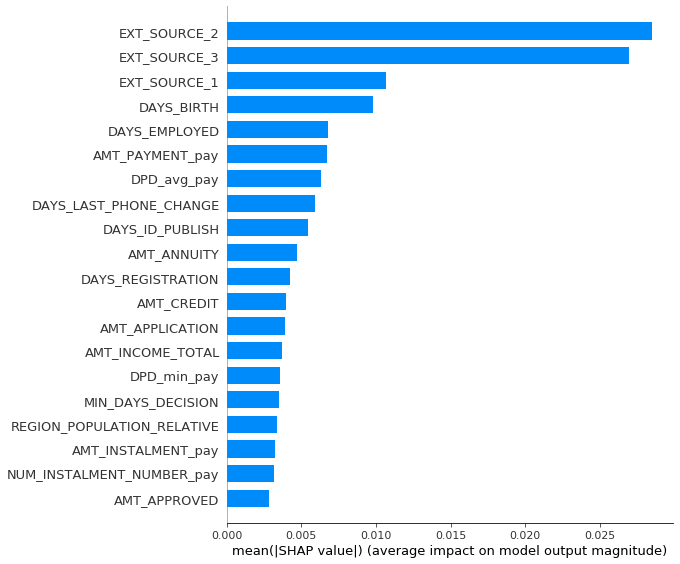

In [156]:
shap.summary_plot(shap_values_1, X_test_20[:1000],plot_type="bar")

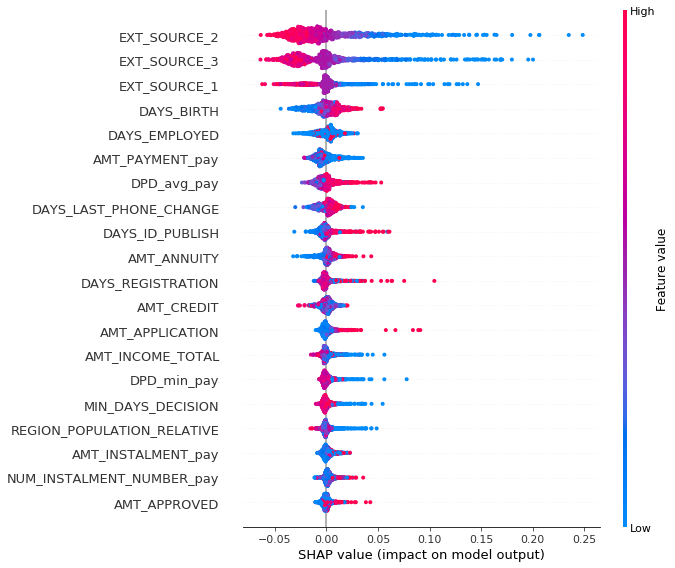

In [157]:
shap.summary_plot(shap_values_1, X_test_20[:1000])

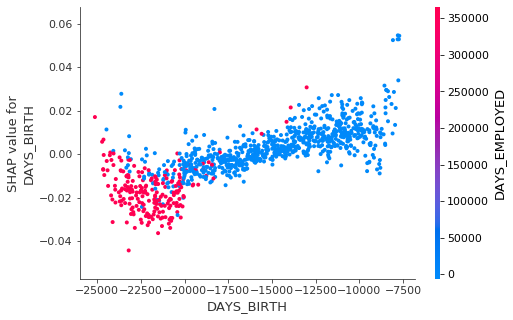

In [85]:
shap.dependence_plot("DAYS_BIRTH", shap_values_1, X_test_20[:1000], interaction_index="DAYS_EMPLOYED")

## SHAP on XGBoost model

In [74]:
%%time
explainer_xgb = shap.TreeExplainer(xgb)
#shap_values_xgb = explainer_xgb.shap_values(X_test_20[:100000])

Wall time: 548 ms


In [75]:
print('Expected Value:', explainer_xgb.expected_value)

Expected Value: -2.4661579435422194


In [76]:
#pd.DataFrame(shap_values_xgb).to_csv('SHAP_NOSMOTED_xgb.csv',index=False)
shap_values_xgb = pd.read_csv('SHAP_NOSMOTED_xgb.csv')
shap_values_xgb = np.asarray(shap_values_xgb)

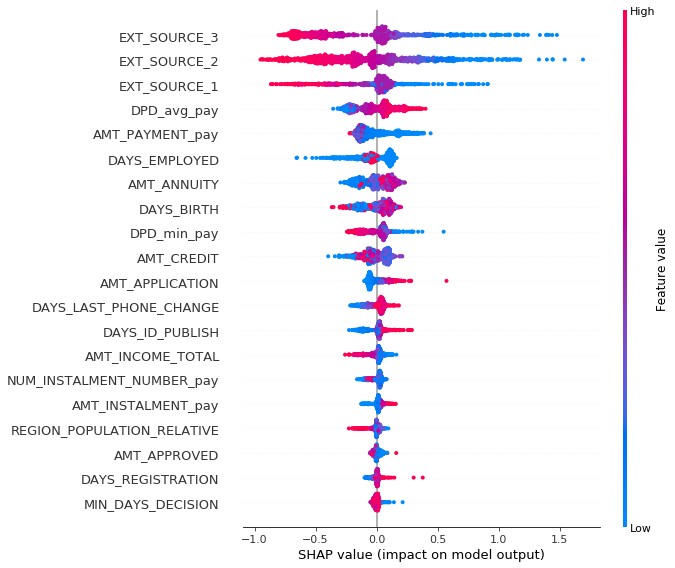

In [159]:
shap.summary_plot(shap_values_xgb[:1000], X_test_20[:1000])

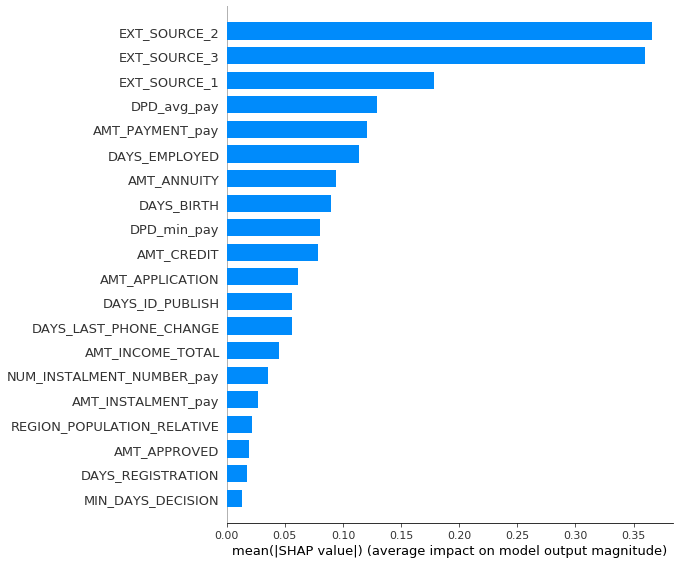

In [158]:
shap.summary_plot(shap_values_xgb, X_test_20[:1000], plot_type="bar")

In [80]:
shap.force_plot(explainer_xgb.expected_value, shap_values_xgb[:1000], X_test_20[:1000])

In [81]:
shap.force_plot(explainer_xgb.expected_value, 
                shap_values_xgb[781,:], X_test_20.iloc[781,:])

In [82]:
shap.force_plot(explainer_xgb.expected_value, 
                shap_values_xgb[32,:], X_test_20.iloc[32,:])

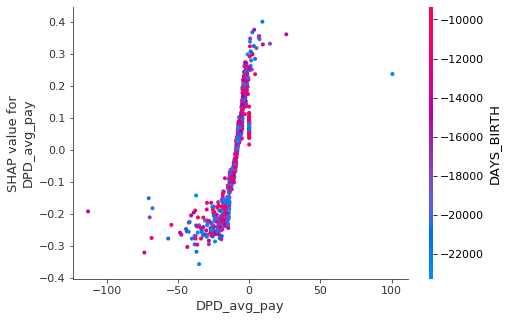

In [97]:
shap.dependence_plot("DPD_avg_pay", shap_values_xgb[:1000], X_test_20[:1000], interaction_index="DAYS_BIRTH")